In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


In [2]:
# # View settings
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
# Import from Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from matplotlib import cm
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram


import scipy.stats as stat
import pylab

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')
# Dataset view settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)

In [3]:
# Loading data in CSV format
df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

In [4]:
# makeing sure that the data is i,ported correctly
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3903,C14013,1509.525178,1.000000,0.00,0.0,0.00,1784.023712,0.000000,0.000000,0.000000,0.250000,5,0,3500.0,513.387513,518.481808,0.000000,12
1960,C12023,274.038592,1.000000,286.19,58.0,228.19,0.000000,0.416667,0.083333,0.416667,0.000000,0,7,1700.0,911.371697,179.244755,0.000000,12
2038,C12101,7105.801894,1.000000,0.00,0.0,0.00,1648.096839,0.000000,0.000000,0.000000,0.083333,8,0,7500.0,1400.282454,4486.832622,0.000000,12
3893,C14003,35.988695,0.636364,294.00,0.0,294.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1200.0,502.277937,188.697505,0.333333,12
2764,C12843,12.313357,0.636364,107.41,0.0,107.41,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,2500.0,128.572704,91.316321,0.555556,12


# -----  1. EDA  -----

# 1.1. Fix the data types if it has any problems.

In [5]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
#checking if there is any duplicates observations
df.duplicated().sum()

0

**Since its a clustring problem, we don't need 'CUST_ID' column in our dataframe**

In [7]:
df = df.iloc[:,range(1,len(df.columns))]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

# 1.2. Fix the NULL values if it exists

In [9]:
# checking the null values per column
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Dermine what to do with the 'CREDIT_LIMIT' 1 NULL value**
> we have 2 possible conditions as follow:
> 
> 1. spicial client who has great score with the bank so this NULL value because he has an unlimited credit card.
> 
> 2. normal client who has a missing value in the dataset.

In [10]:
# checking the clint's info
df[df['CREDIT_LIMIT'].isna()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


**As we can see he is the secound condition**
> **The Solution**
> drop the observation from the dataset

In [11]:
df = df[df['CREDIT_LIMIT'].notna()]

In [12]:
# first problem is solved
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Moving on to the next problem 'MINIMUM_PAYMENTS'**
> from the **Data card** -> "MINIMUM_PAYMENTS : Minimum amount of payments made by user".

**So, what if there is clients that didn't make any transactions?**
> we will find 2 cases to thier **MINIMUM_PAYMENTS**:
> 1. MINIMUM_PAYMENTS = Null.
> 2. MINIMUM_PAYMENTS = 0.

*in this case we need to check the data description to make a dicision.*

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1564.647593,2081.584016,0.000000,128.365782,873.680279,2054.372848,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.000000,39.800000,361.490000,1110.170000,49039.57000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.000000,0.000000,38.000000,577.830000,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.000000,0.000000,89.000000,468.650000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.000000,0.000000,0.000000,1113.868654,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.000000,0.000000,0.000000,0.222222,1.50000


As we can see **min** of **payments** = 0.
so, we need to check all the clints who has 0 payments

In [14]:
df[df['PAYMENTS']==0].loc[:,['PAYMENTS','MINIMUM_PAYMENTS']].count()

PAYMENTS            240
MINIMUM_PAYMENTS      0
dtype: int64

we have total of **240** client who didn't make any **PAYMENT** and all of them has **NULL** value in the **MINIMUM_PAYMENTS**.
>this is completly normal to find and can be fixed by just changing the value to **0**.

In [15]:
df.loc[df['PAYMENTS'] == 0, 'MINIMUM_PAYMENTS'] = 0

In [16]:
df.isna().sum()

BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         0
PAYMENTS                             0
MINIMUM_PAYMENTS                    73
PRC_FULL_PAYMENT                     0
TENURE                               0
dtype: int64

**What about the remaining NULL values?**

> We will drop these observations for 2 reasons:
> 1. they are only 73 client form 8950 client **0.8 %** of the dataset.
> 2. i can't find any reason causes them to be NULL values.
> 

In [17]:
df = df[df['MINIMUM_PAYMENTS'].notna()]

In [18]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# 1.3. Handling the outlaiers.

**I created 2 functions to help me visualizing the data and detrmine the outliers.**

In [19]:
def plots_helper(column): # calculating the IQR to detrmine the exact number of outliers in each feature and skewness
    Q3 = np.quantile(column, 0.75)
    Q1 = np.quantile(column, 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    oc = len(column[column>upper_range]) + len(column[column<lower_range])
    percent = round((oc/len(column))*100,2)
    sk = round(stat.skew(column),2)
    return oc , percent , sk

In [20]:
def box_dist_prob_plots(df): # BoxPlot , Distribution, Histogram and ProbabilityPlot
    number_features = len(df.columns)
    plt.figure(figsize = (25,number_features*6))
    for column,i in zip(df,range(1,number_features*3+1,3)):
        # coalculating the outliers and its percentage
        oc , percent , sk = plots_helper(df[column])

        # plotting the 3 diagrams for each feature
        plt.subplot(number_features, 3, i)
        sns.boxplot(df[column])
        plt.xlabel(column, size=14)
        plt.title(f'Number of outliers {oc} ({percent}%)', fontsize=12, color ='red', fontweight = 'bold')
        
        plt.subplot(number_features, 3, i+1)
        sns.distplot(df[column],kde=False)
        plt.title(f'Skewness = {sk}', fontsize=12, color ='red', fontweight = 'bold')
        plt.xlabel(column, size=14)
        plt.ylabel("Count", size=14)
        plt.axvline(x=df[column].median(),ls='--')
        plt.axvline(x=df[column].mean())
        plt.legend(['mean', 'median'])
        
        plt.subplot(number_features, 3, i+2)
        stat.probplot(df[column],dist='norm',plot=pylab,rvalue=True)

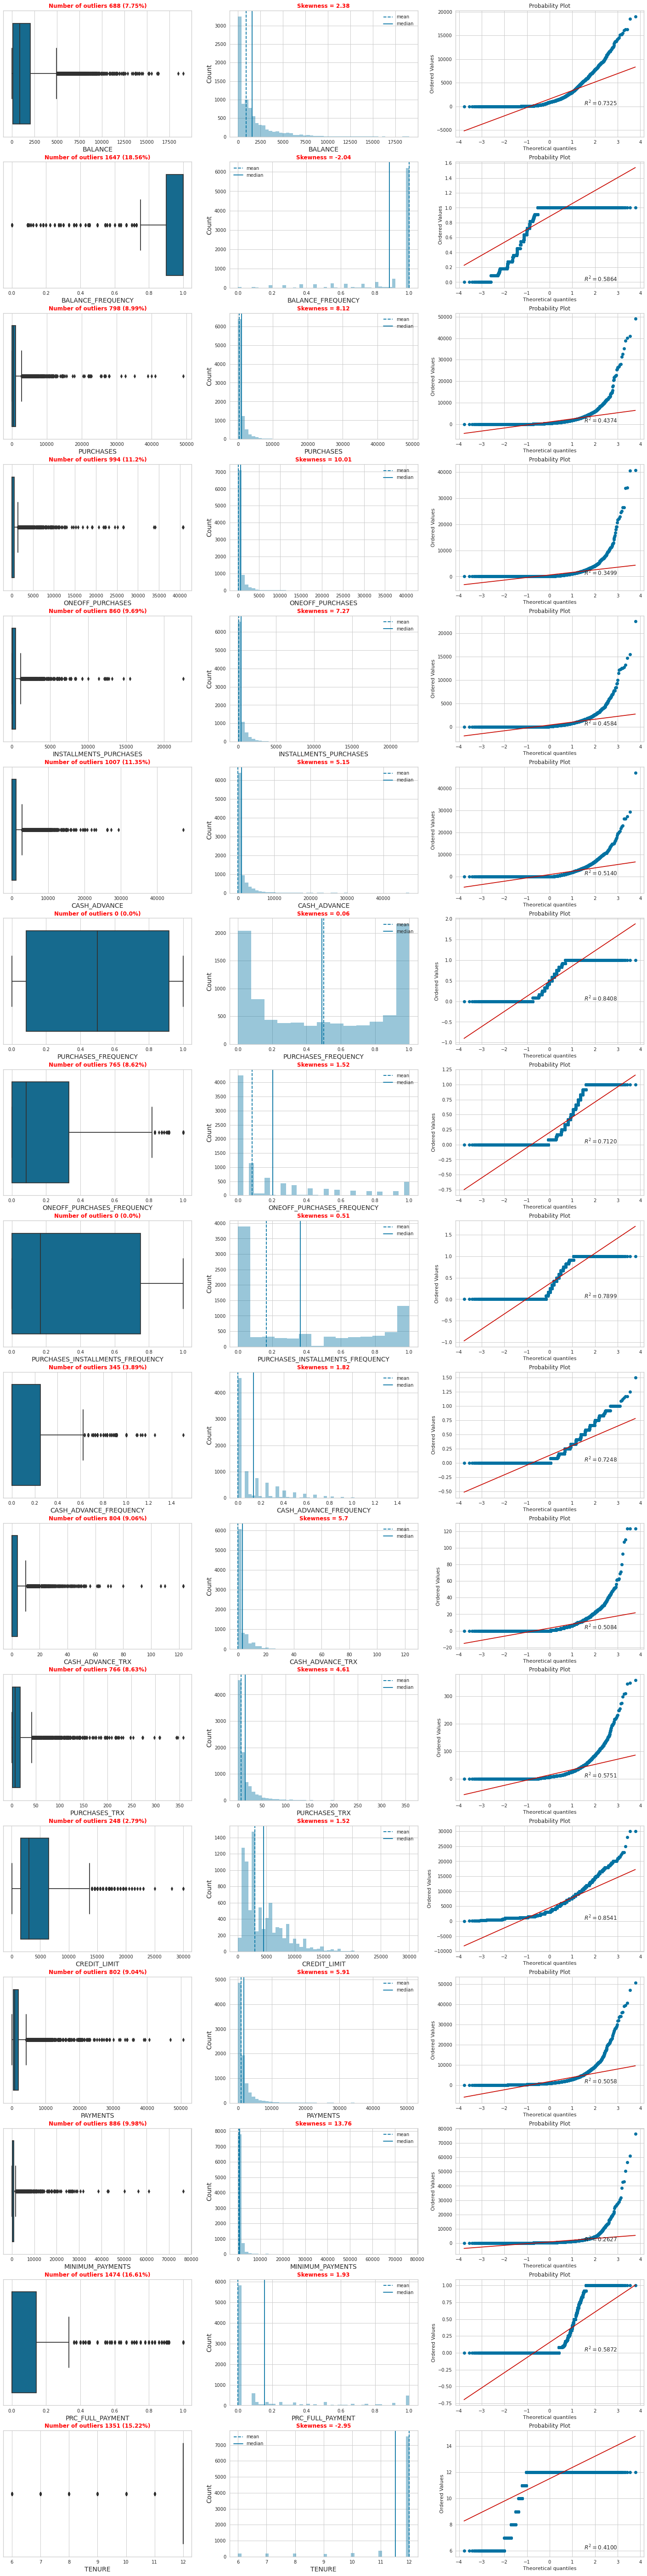

In [21]:
box_dist_prob_plots(df)

In [22]:
exp_features = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']
freq_features = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']

exp_df = df.loc[:,exp_features]
freq_df = df.loc[:,freq_features]
tenure_df = df.loc[:,'TENURE']

for i in exp_df.columns:
    exp_df[i],_ = stat.boxcox(exp_df[i].apply(lambda x: x+1e-8)) # boxcox
for i in freq_df.columns:
    freq_df[i],_ = stat.yeojohnson(freq_df[i]) # yeojohnson
trans_df = pd.concat([exp_df, freq_df, tenure_df], axis=1)

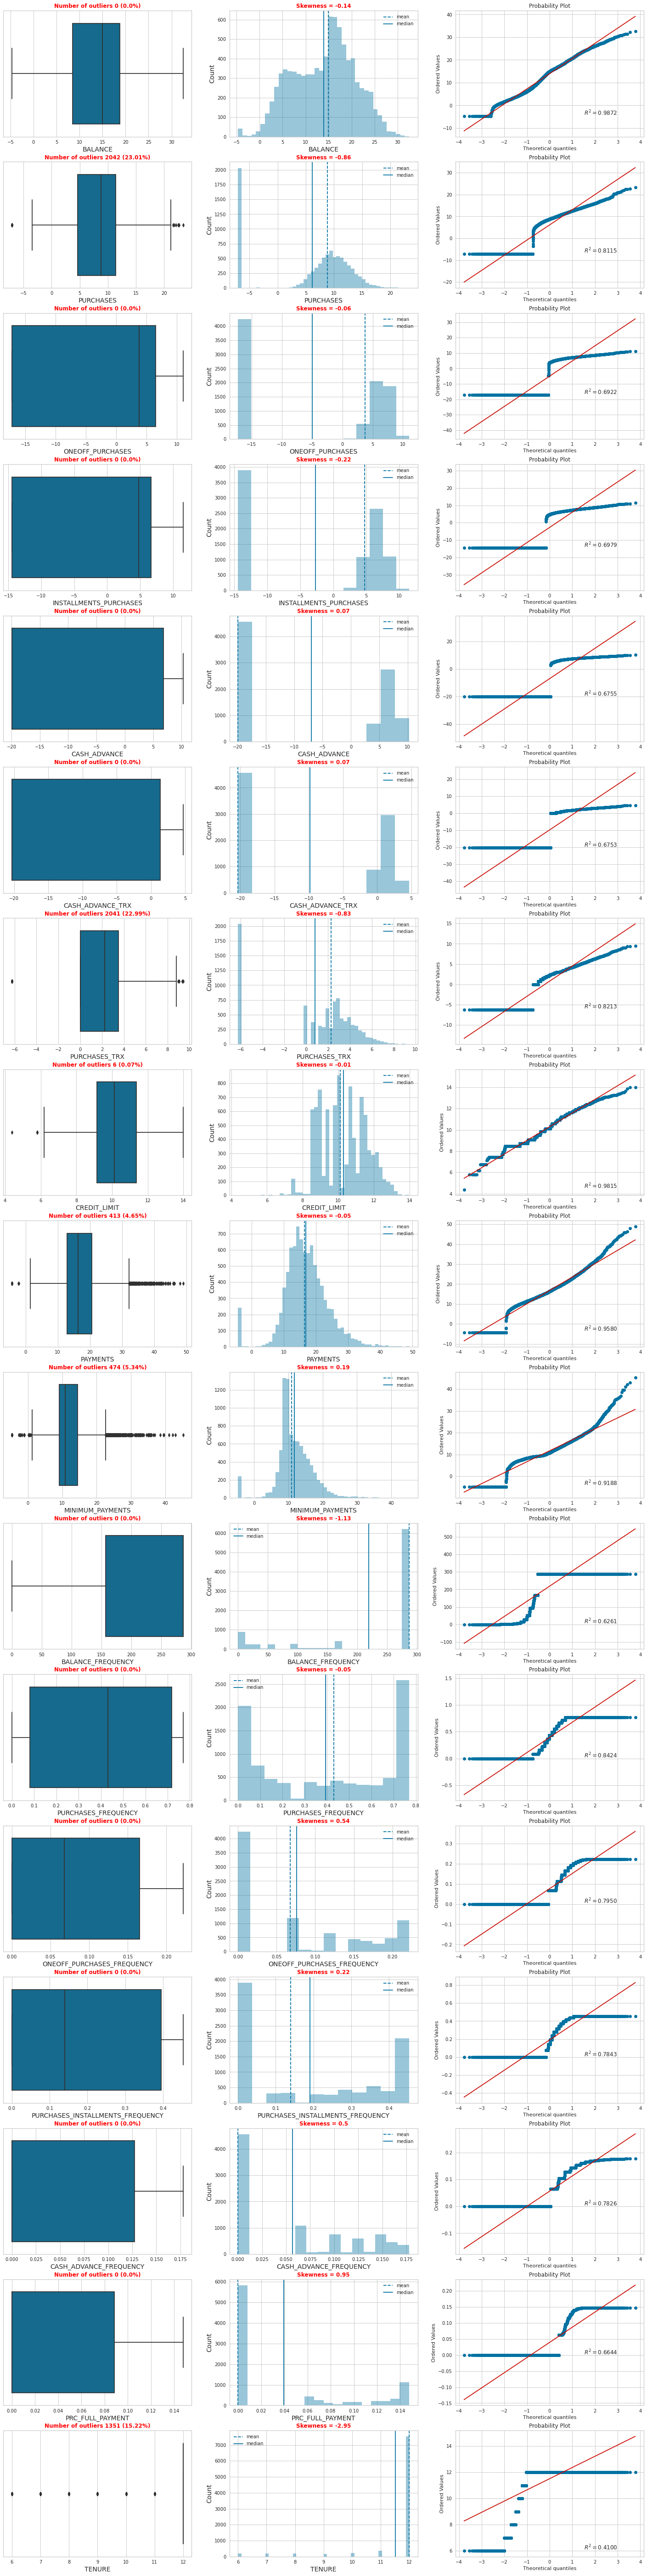

In [23]:
box_dist_prob_plots(trans_df)

In [24]:
mms = MinMaxScaler()
norm_df = pd.DataFrame(mms.fit_transform(trans_df),columns=trans_df.columns)

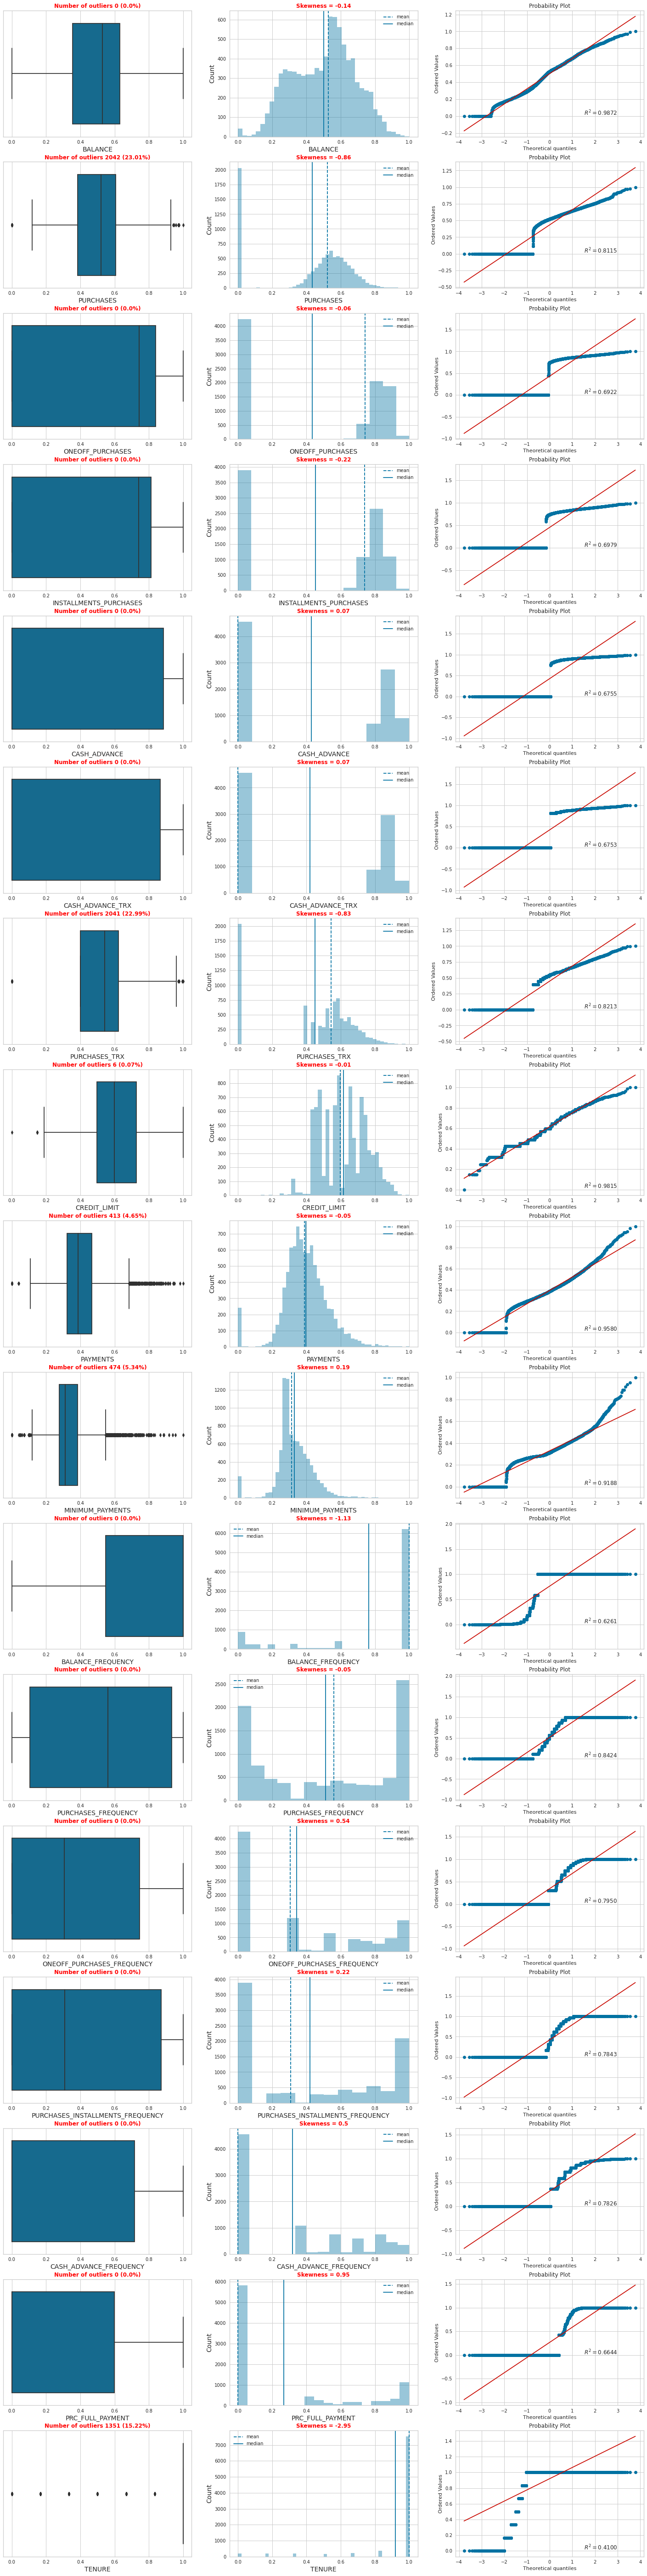

In [25]:
box_dist_prob_plots(norm_df)

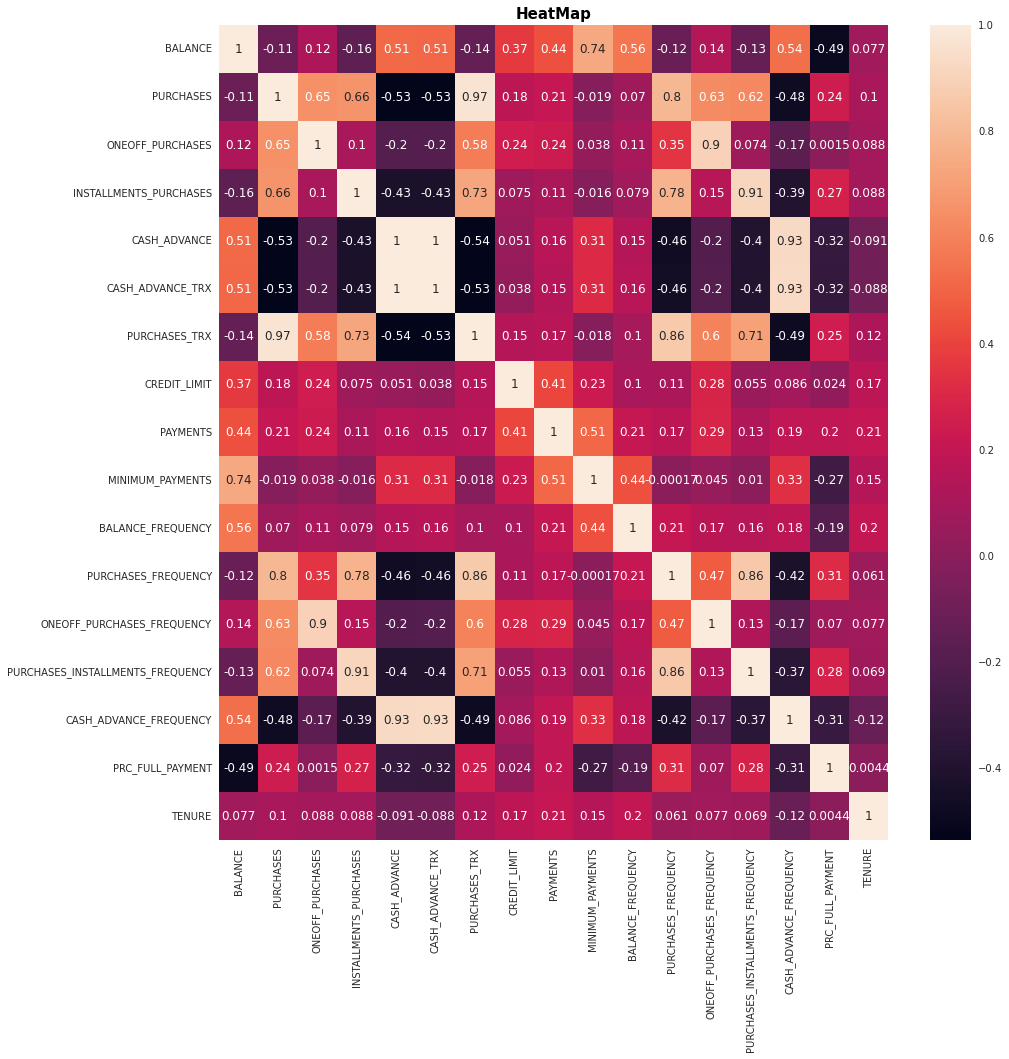

['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']


In [26]:
# clean this part and add it after removing the id then say its about getting intuation of the highly correlated features so we expect to remove at least this number
plt.figure(figsize=(15,15))
sns.heatmap(data=norm_df.corr(),annot=True);
plt.title('HeatMap', fontsize = 15, color ='black', fontweight = 'bold')
plt.show();


cor_matrix = norm_df.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8) or any(upper_tri[column] < -0.8)]
print(to_drop)

In [27]:
# mention the r-square is needed to pass 90% and less than 3% outliers
# make all the tests on the balance and put them all in  dataframe with header has the name of the methode then plot them all
def test_transformation(df,column):
        # log transformation
    log = df[column].copy().apply(lambda x: np.log2(x + 1))
    # box_cox = stat.boxcox(df['BALANCE'].copy().apply(lambda x: x+1),0)

        # reciprocal transformation
    reciprocal = df[column].copy().apply(lambda x: 1/(x+0.1))

        # square root translation
    sqare_root = df[column].copy().apply(lambda x: x**(1/2))
    
        # square translation
    sqare = df[column].copy().apply(lambda x: x**2)
    
        # logit function
    logit = df[column].copy().apply(lambda x: np.log((x*(1.01-x))+0.1))
    
        # yeojohnson transformation
    yeo_johnson, lmda = stat.yeojohnson(df[column].copy())
    print(lmda)
    
        # boxcox transformation
    box_cox,lmda = stat.boxcox(df[column].copy().apply(lambda x: x+1e-8))
    print(lmda)

    transformations_df = pd.DataFrame({'normal':df[column],
                                       'log': log,
                                       'reciprocal': reciprocal,
                                       'sqare_root': sqare_root,
                                       'sqare': sqare,
                                       'logit':logit,
                                       'yeo_johnson':yeo_johnson,
                                       'box_cox': box_cox},
                                      columns=['normal','log', 'reciprocal','sqare_root','sqare','logit','yeo_johnson', 'box_cox'])
    return transformations_df

In [28]:
# Statistical Summary of Normalized Data
norm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8876.0,0.501337,0.180233,0.0,0.355362,0.527472,0.629386,1.0
PURCHASES,8876.0,0.434004,0.252682,0.0,0.384006,0.521774,0.606270,1.0
ONEOFF_PURCHASES,8876.0,0.433937,0.417801,0.0,0.000000,0.741739,0.840269,1.0
INSTALLMENTS_PURCHASES,8876.0,0.452854,0.401985,0.0,0.000000,0.739730,0.814054,1.0
CASH_ADVANCE,8876.0,0.427658,0.441041,0.0,0.000000,0.000000,0.885340,1.0
CASH_ADVANCE_TRX,8876.0,0.421496,0.434531,0.0,0.000000,0.000000,0.867405,1.0
PURCHASES_TRX,8876.0,0.449237,0.262947,0.0,0.398638,0.542665,0.623637,1.0
CREDIT_LIMIT,8876.0,0.615801,0.134748,0.0,0.496871,0.597873,0.727120,1.0
PAYMENTS,8876.0,0.395898,0.128685,0.0,0.321318,0.387694,0.466269,1.0
MINIMUM_PAYMENTS,8876.0,0.329268,0.104711,0.0,0.276185,0.312201,0.384563,1.0


In [29]:
# Instantiate the PCA
pca = PCA()

# Apply the PCA
df_pca = pca.fit_transform(norm_df)

# Table of the amount of variation explained
num_com = range(1, 18)
df_com = pd.DataFrame(num_com, columns=['Number of Components'])
ev = pca.explained_variance_
df_ev = pd.DataFrame(ev, columns=['Explained Variance'])
df_ev = pd.concat([df_com, df_ev], axis=1)
df_ev.index = df_ev.index + 1
df_ev
df_ev.style.set_properties(**{'text-align': 'center'})

,Number of Components,Explained Variance
1,1,0.839238
2,2,0.346450
3,3,0.271301
4,4,0.151387
5,5,0.105642
6,6,0.049141
7,7,0.028356
8,8,0.025630
9,9,0.018657
10,10,0.014697


In [30]:
# Table of Percentage of Explained Variance
num_com = range(1, 18)
df_com = pd.DataFrame(num_com, columns=['Number of Components'])
pev = (pca.explained_variance_ratio_) * 100
df_pev = pd.DataFrame(pev, columns=['Percentage of Explained Variance'])
df_pev = pd.concat([df_com, df_pev], axis=1)
df_pev.index = df_ev.index + 1
df_pev
df_pev.style.set_properties(**{'text-align': 'center'})

,Number of Components,Percentage of Explained Variance
2,1,44.449650
3,2,18.349503
4,3,14.369247
5,4,8.018108
6,5,5.595273
7,6,2.602729
8,7,1.501869
9,8,1.357459
10,9,0.988137
11,10,0.778423


In [31]:
# Table Cumulative percentage of explained variance
num_com = range(1, 18)
com = pd.DataFrame(num_com, columns=['Number of Components'])
cpev = (pca.explained_variance_ratio_.cumsum()) * 100
df_cpev = pd.DataFrame(cpev, columns=['Cumulative Percentage of Explained Variance'])
df_cpev = pd.concat([df_com, df_cpev], axis=1)
df_cpev.index = df_cpev.index + 1
df_cpev
df_cpev.style.set_properties(**{'text-align': 'center'})

,Number of Components,Cumulative Percentage of Explained Variance
1,1,44.449650
2,2,62.799153
3,3,77.168400
4,4,85.186508
5,5,90.781780
6,6,93.384509
7,7,94.886378
8,8,96.243837
9,9,97.231974
10,10,98.010397


In [32]:
# Apply PCA to 4 components
pca1 = PCA(n_components=8, random_state=18)
df_pca1 = pca1.fit_transform(norm_df)
df_pca1.shape

(8876, 8)

In [33]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


def plotTestCases(df,k):
  hacerror = []
  for i in range(2,k+2):
    hac = AgglomerativeClustering(i)
    hac.fit(df[["x","y"]])
    df["assignments"] = hac.labels_
    hacerror.append(silhouette_score(df[["x","y"]], df["assignments"]))
  plt.plot(range(2,k+2),hacerror)
  plt.show()


  kmerror = []
  for i in range(1,k):
    km = KMeans(i)
    km.fit(d1[["x","y"]])
    kmerror.append(km.inertia_)
  plt.plot(range(1,k),kmerror)
  plt.show()


  gmerror = []
  for i in range(1,k):
    gm = GaussianMixture(i)
    gm.fit(df[["x","y"]])
    gmerror.append(gm.score(df[["x","y"]]))
  plt.plot(range(1,k),gmerror)
  plt.show()




In [35]:
def testResults(df,h,k,g):

  hac = AgglomerativeClustering(h)
  km = KMeans(k)
  gm = GaussianMixture(g)

  hac.fit(df[["x","y"]])
  km.fit(df[["x","y"]])
  gm.fit(df[["x","y"]])

  df["hac"] = hac.labels_
  df["km"] = km.labels_
  df["gm"] = gm.predict(df[["x","y"]])


  print(ggplot(df, aes(x = "x", y = "y",
                      color = "factor(hac)")) +
              geom_point() +
              theme_minimal() +
              scale_color_discrete(name = "Cluster Assignment") +
              theme(panel_grid_major = element_blank()) + 
              labs(title = "Hierarchical Agglomeretive"))


  print(ggplot(df, aes(x = "x", y = "y",
                      color = "factor(km)")) +
              geom_point() +
              theme_minimal() +
              scale_color_discrete(name = "Cluster Assignment") +
              theme(panel_grid_major = element_blank()) + 
              labs(title = "KMeans"))


  print(ggplot(df, aes(x = "x", y = "y",
                      color = "factor(gm)")) +
              geom_point() +
              theme_minimal() +
              scale_color_discrete(name = "Cluster Assignment") +
              theme(panel_grid_major = element_blank()) + 
              labs(title = "Gaussian Mixtures"))